In [154]:
#Imports 
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [155]:
#Setting all photos to be 256x256. Also assigning label - 0 cat, 1 dog
training_dataset = keras.utils.image_dataset_from_directory(
    directory = '../input/dogs-vs-cats/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

testing_dataset = keras.utils.image_dataset_from_directory(
    directory = '../input/dogs-vs-cats/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [156]:
#Img arr is 0-255, converting to range 0-1
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

training_dataset = training_dataset.map(process)
testing_dataset = testing_dataset.map(process)

In [157]:
#GPU initialised
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Model Implementation

In [158]:
#Creating a CNN model

model = Sequential()

#1st Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), padding = 'same', input_shape=(256,256,3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))
model.add(BatchNormalization())

#2nd Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))
model.add(BatchNormalization())

#3rd Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), padding = 'same', activation= 'relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))
model.add(BatchNormalization())

#4th Layer
model.add(Conv2D(filters=128, kernel_size=(3,3), padding = 'same', activation= 'relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='same'))
model.add(BatchNormalization())

#5th Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), padding = 'same', activation= 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(5,5), strides=3, padding='same'))
model.add(BatchNormalization())


#Flatten
model.add(Flatten())

#Connecting Dense Layer
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))


#Output Layer
model.add(Dense(1,activation='sigmoid'))

In [159]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization_35 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 64, 64, 128)      

In [181]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(training_dataset,epochs=10,validation_data=testing_dataset)

Epoch 1/10
625/625 [==============================] - 51s 80ms/step - loss: 0.0373 - accuracy: 0.9876 - val_loss: 0.1981 - val_accuracy: 0.9344
Epoch 2/10


# Results 

**Average Case**

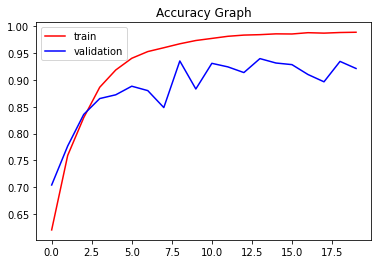

In [162]:
import matplotlib.pyplot as plt
plt.title('Accuracy Graph')
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

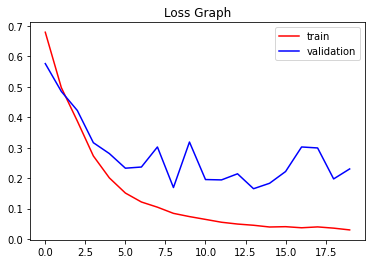

In [163]:
plt.title('Loss Graph')
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [164]:
model.evaluate(testing_dataset)

157/157 [==============================] - 9s 56ms/step - loss: 0.2303 - accuracy: 0.9212


[0.23026752471923828, 0.9211999773979187]

**Best Case**

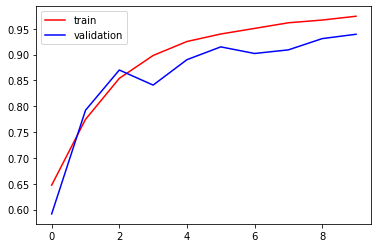

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

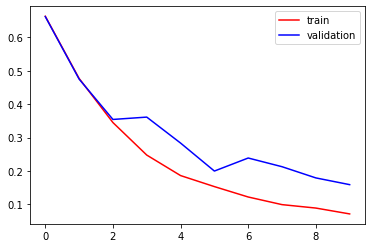

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [18]:
model.evaluate(testing_dataset)

157/157 [==============================] - 9s 56ms/step - loss: 0.1590 - accuracy: 0.9394


[0.158998042345047, 0.9394000172615051]

# Testing Random Images

In [165]:
import cv2

In [166]:
test_imgc = cv2.imread('../input/dogs-vs-cats/test/cats/cat.10157.jpg')
test_imgd = cv2.imread('../input/dogs-vs-cats/test/dogs/dog.10021.jpg')


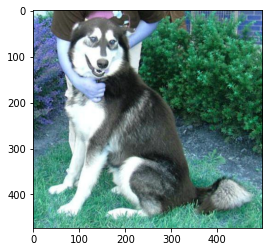

In [167]:

plt.imshow(test_imgd)

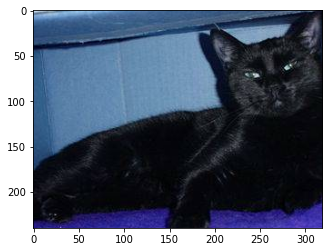

In [168]:
plt.imshow(test_imgc)

In [169]:
test_imgc.shape

(240, 319, 3)

In [170]:
test_imgd.shape

(473, 499, 3)

In [171]:
test_imgc = cv2.resize(test_imgc,(256,256))


In [172]:
test_imgd = cv2.resize(test_imgd,(256,256))

In [173]:
test_imgc.shape

(256, 256, 3)

In [174]:
test_imgd.shape

(256, 256, 3)

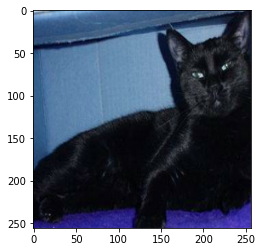

In [175]:
plt.imshow(test_imgc)


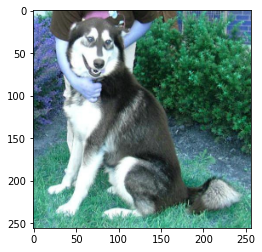

In [176]:
plt.imshow(test_imgd)

In [177]:
test_input1 = test_imgc.reshape((1,256,256,3))


In [178]:
test_input2 = test_imgd.reshape((1,256,256,3))

In [179]:
model.predict(test_input1)

array([[0.]], dtype=float32)

In [180]:
model.predict(test_input2)

array([[1.]], dtype=float32)